<a href="https://colab.research.google.com/github/venkatesh-r96/Structured-Data-Assignment/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Structured Data Assignment**

**Brief Description of the Dataset** -
The dataset in question contains a comprehensive collection of electronic
health records belonging to patients who have been diagnosed with a specific
disease. These health records comprise a detailed log of every aspect of the
patients' medical history, including all diagnoses, symptoms, prescribed drug
treatments, and medical tests that they have undergone. Each row represents a
healthcare record/medical event for a patient and it includes a timestamp for each
entry/event, thereby allowing for a chronological view of the patient's medical history

# Problem 1

The objective in this assignment is to develop a predictive model which will predict
whether a patient will be eligible*** for “Target Drug” or not in next 30 days. Knowing
if the patient is eligible or not will help physician treating the patient make informed
decision on the which treatments to give.


In [1]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the dataset
df = pd.read_parquet("/content/drive/MyDrive/Data Science/Structured_Data_Assignment/train.parquet", engine="auto")
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [4]:
# make sure all datas in correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [5]:
# checking null values
df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [6]:
# checking duplicated values
df.duplicated()

0           False
1           False
3           False
4           False
8           False
            ...  
29080886    False
29080897    False
29080900    False
29080903    False
29080911    False
Length: 3220868, dtype: bool

In [7]:
df.duplicated().sum()

35571

In [8]:
duplicate_values = df[df.duplicated()]
duplicate_values

,Patient-Uid,Date,Incident
3681,a0dca226-1c7c-11ec-9eef-16262ee38c7f,2020-07-24,DRUG_TYPE_6
4131,a0dcc4e6-1c7c-11ec-bbd2-16262ee38c7f,2015-10-13,DRUG_TYPE_5
6025,a0dd0d0e-1c7c-11ec-9bd5-16262ee38c7f,2015-06-18,PRIMARY_DIAGNOSIS
10028,a0de5949-1c7c-11ec-b2e8-16262ee38c7f,2019-08-22,DRUG_TYPE_8
11082,a0ddc121-1c7c-11ec-b9ca-16262ee38c7f,2018-04-03,DRUG_TYPE_7
...,...,...,...
29065316,a0ef0c1e-1c7c-11ec-a241-16262ee38c7f,2015-12-30,DRUG_TYPE_7
29065731,a0eee1ee-1c7c-11ec-ba37-16262ee38c7f,2019-07-17,DRUG_TYPE_7
29066103,a0f08b3a-1c7c-11ec-bfcf-16262ee38c7f,2017-06-13,DRUG_TYPE_7
29072425,a0efd1e7-1c7c-11ec-94ed-16262ee38c7f,2018-07-24,DRUG_TYPE_7


In [9]:
duplicate_values['Incident'].value_counts()

DRUG_TYPE_6          12318
DRUG_TYPE_7           7543
PRIMARY_DIAGNOSIS     7023
DRUG_TYPE_11          2699
DRUG_TYPE_5           1570
DRUG_TYPE_8           1360
DRUG_TYPE_0           1124
DRUG_TYPE_3           1061
DRUG_TYPE_2            638
DRUG_TYPE_1            101
DRUG_TYPE_13            51
SYMPTOM_TYPE_29         40
DRUG_TYPE_16            18
DRUG_TYPE_10            14
DRUG_TYPE_12            11
Name: Incident, dtype: int64

In [10]:
# checking how the duplicate values are there
duplicate_values[duplicate_values['Incident']=='DRUG_TYPE_12']

,Patient-Uid,Date,Incident
117553,a0dd8fcf-1c7c-11ec-a673-16262ee38c7f,2015-07-16,DRUG_TYPE_12
681861,a0e15f0b-1c7c-11ec-b996-16262ee38c7f,2016-05-11,DRUG_TYPE_12
843588,a0e23296-1c7c-11ec-8aeb-16262ee38c7f,2020-01-02,DRUG_TYPE_12
942711,a0e15f0b-1c7c-11ec-b996-16262ee38c7f,2016-05-11,DRUG_TYPE_12
2217046,a0e11faa-1c7c-11ec-bac1-16262ee38c7f,2018-05-11,DRUG_TYPE_12
20518822,a0ef1765-1c7c-11ec-a575-16262ee38c7f,2018-05-25,DRUG_TYPE_12
22074249,a0eee7bd-1c7c-11ec-a30b-16262ee38c7f,2018-05-02,DRUG_TYPE_12
23118627,a0ef1765-1c7c-11ec-a575-16262ee38c7f,2016-09-21,DRUG_TYPE_12
23166140,a0eee7bd-1c7c-11ec-a30b-16262ee38c7f,2018-05-02,DRUG_TYPE_12
23941900,a0ef1765-1c7c-11ec-a575-16262ee38c7f,2016-09-21,DRUG_TYPE_12


In [11]:
# deleting the duplicate values
df.drop_duplicates()
df.shape

(3220868, 3)

In [12]:
df['Patient-Uid'].value_counts()

a0ddfd2c-1c7c-11ec-876d-16262ee38c7f    1645
a0ea618f-1c7c-11ec-93fb-16262ee38c7f    1320
a0e553c4-1c7c-11ec-83f1-16262ee38c7f    1163
a0df4809-1c7c-11ec-be0b-16262ee38c7f    1099
a0ec2afe-1c7c-11ec-befd-16262ee38c7f    1075
                                        ... 
a0ecc127-1c7c-11ec-92b5-16262ee38c7f      31
a0eb794b-1c7c-11ec-92d7-16262ee38c7f      30
a0f02cd8-1c7c-11ec-96a0-16262ee38c7f      28
a0efac48-1c7c-11ec-9daa-16262ee38c7f      25
a0f0d0b5-1c7c-11ec-9901-16262ee38c7f      24
Name: Patient-Uid, Length: 27033, dtype: int64

In [13]:
df['Date'].value_counts()

2019-05-21    3678
2019-05-22    3387
2019-03-05    3198
2019-05-14    3169
2019-03-12    3034
              ... 
2018-02-28     312
2017-02-28     286
2020-02-29     285
2016-01-29     273
2016-02-29     259
Name: Date, Length: 1977, dtype: int64

In [14]:
df['Incident'].unique()

array(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
   

In [15]:
Incident_counts = df['Incident'].value_counts()
Incident_counts

DRUG_TYPE_6          561934
DRUG_TYPE_1          484666
PRIMARY_DIAGNOSIS    431902
DRUG_TYPE_0          300005
DRUG_TYPE_7          258782
DRUG_TYPE_2          256841
DRUG_TYPE_8          160066
DRUG_TYPE_3          127676
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           57510
DRUG_TYPE_11          48118
SYMPTOM_TYPE_0        46078
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20925
DRUG_TYPE_14          17306
DRUG_TYPE_13          12372
DRUG_TYPE_12           9551
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5950
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYPE_4      

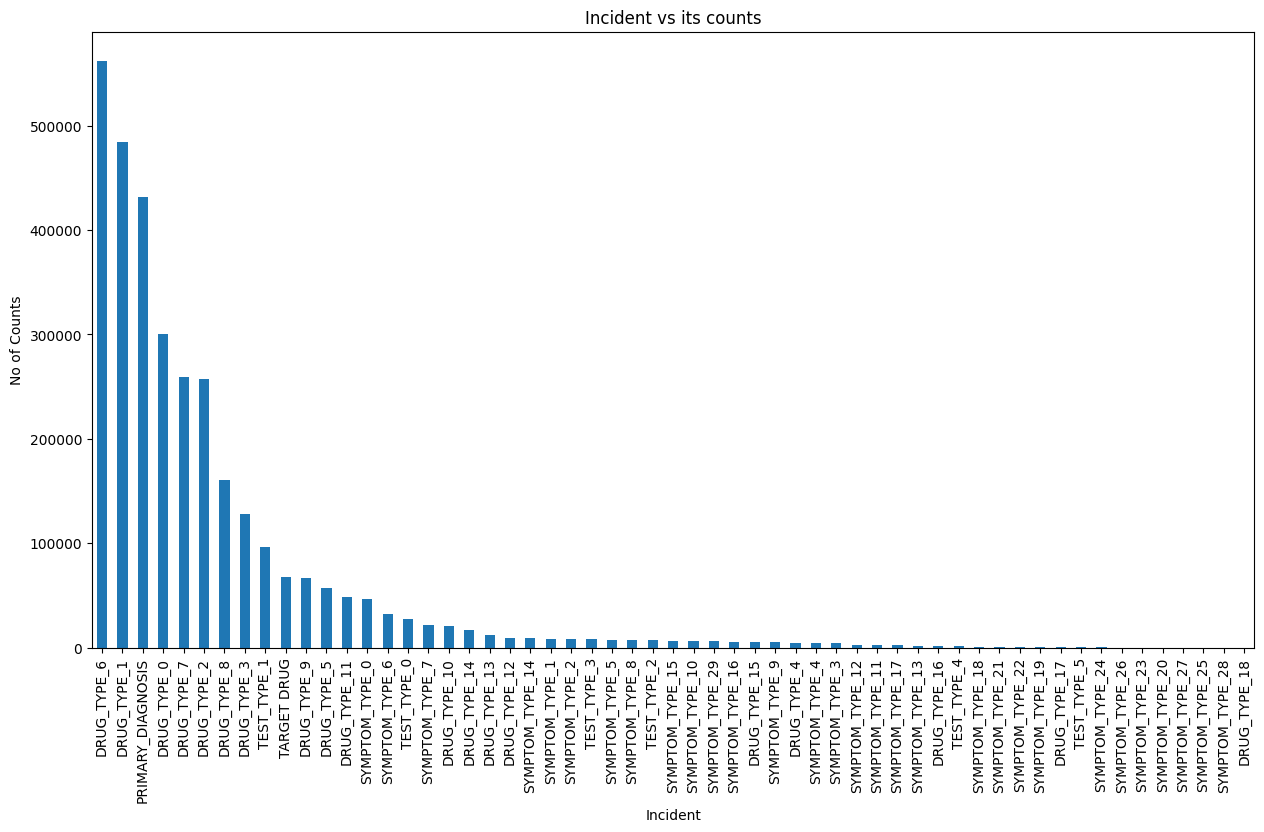

In [16]:
# Creating the bar plot using incident counts
Incident_counts.plot(kind = 'bar', figsize=(15,8))
plt.xlabel("Incident")
plt.ylabel("No of Counts")
plt.title("Incident vs its counts")
plt.show()

This plot is showing DRUG_TYPE_6 has more number of counts

In [89]:
# Extract the month and year
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Group
Incident_month_year = df.groupby(['year', 'month', 'Incident']).size().reset_index(name='Count')

In [91]:
Incident_month_year

,year,month,Incident,Count
0,2015,4,DRUG_TYPE_0,2079
1,2015,4,DRUG_TYPE_1,4826
2,2015,4,DRUG_TYPE_11,644
3,2015,4,DRUG_TYPE_12,106
4,2015,4,DRUG_TYPE_13,67
...,...,...,...,...
3279,2020,9,TEST_TYPE_0,23
3280,2020,9,TEST_TYPE_1,132
3281,2020,9,TEST_TYPE_2,2
3282,2020,9,TEST_TYPE_3,6


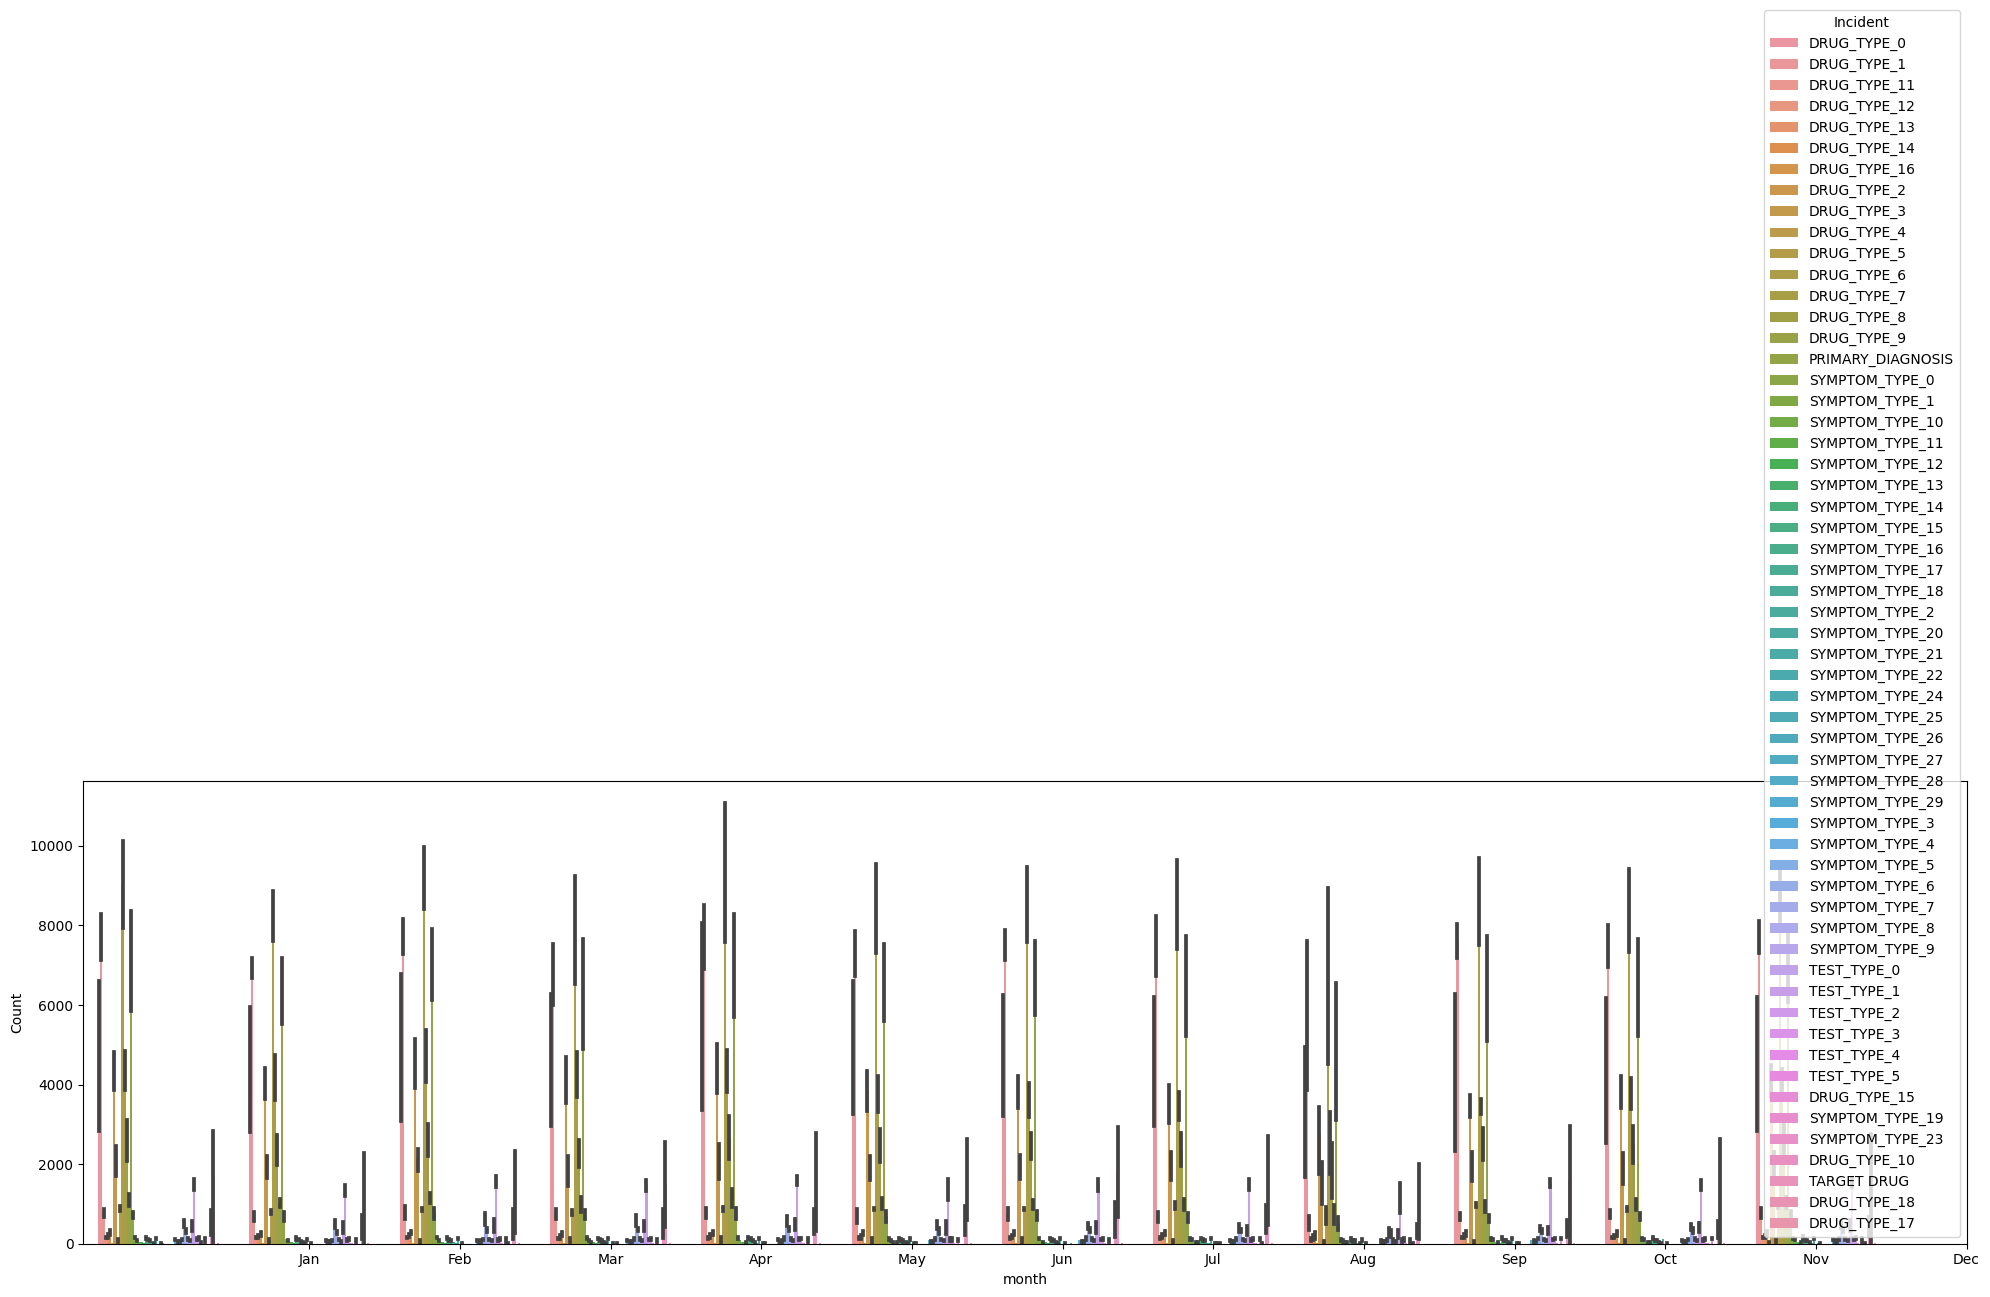

In [96]:
plt.figure(figsize=(20,10))

sns.barplot(data = Incident_month_year, x='month', y='Count', hue='Incident')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

This plot is showing that all the 5 years, more patients are taken drug in  March month

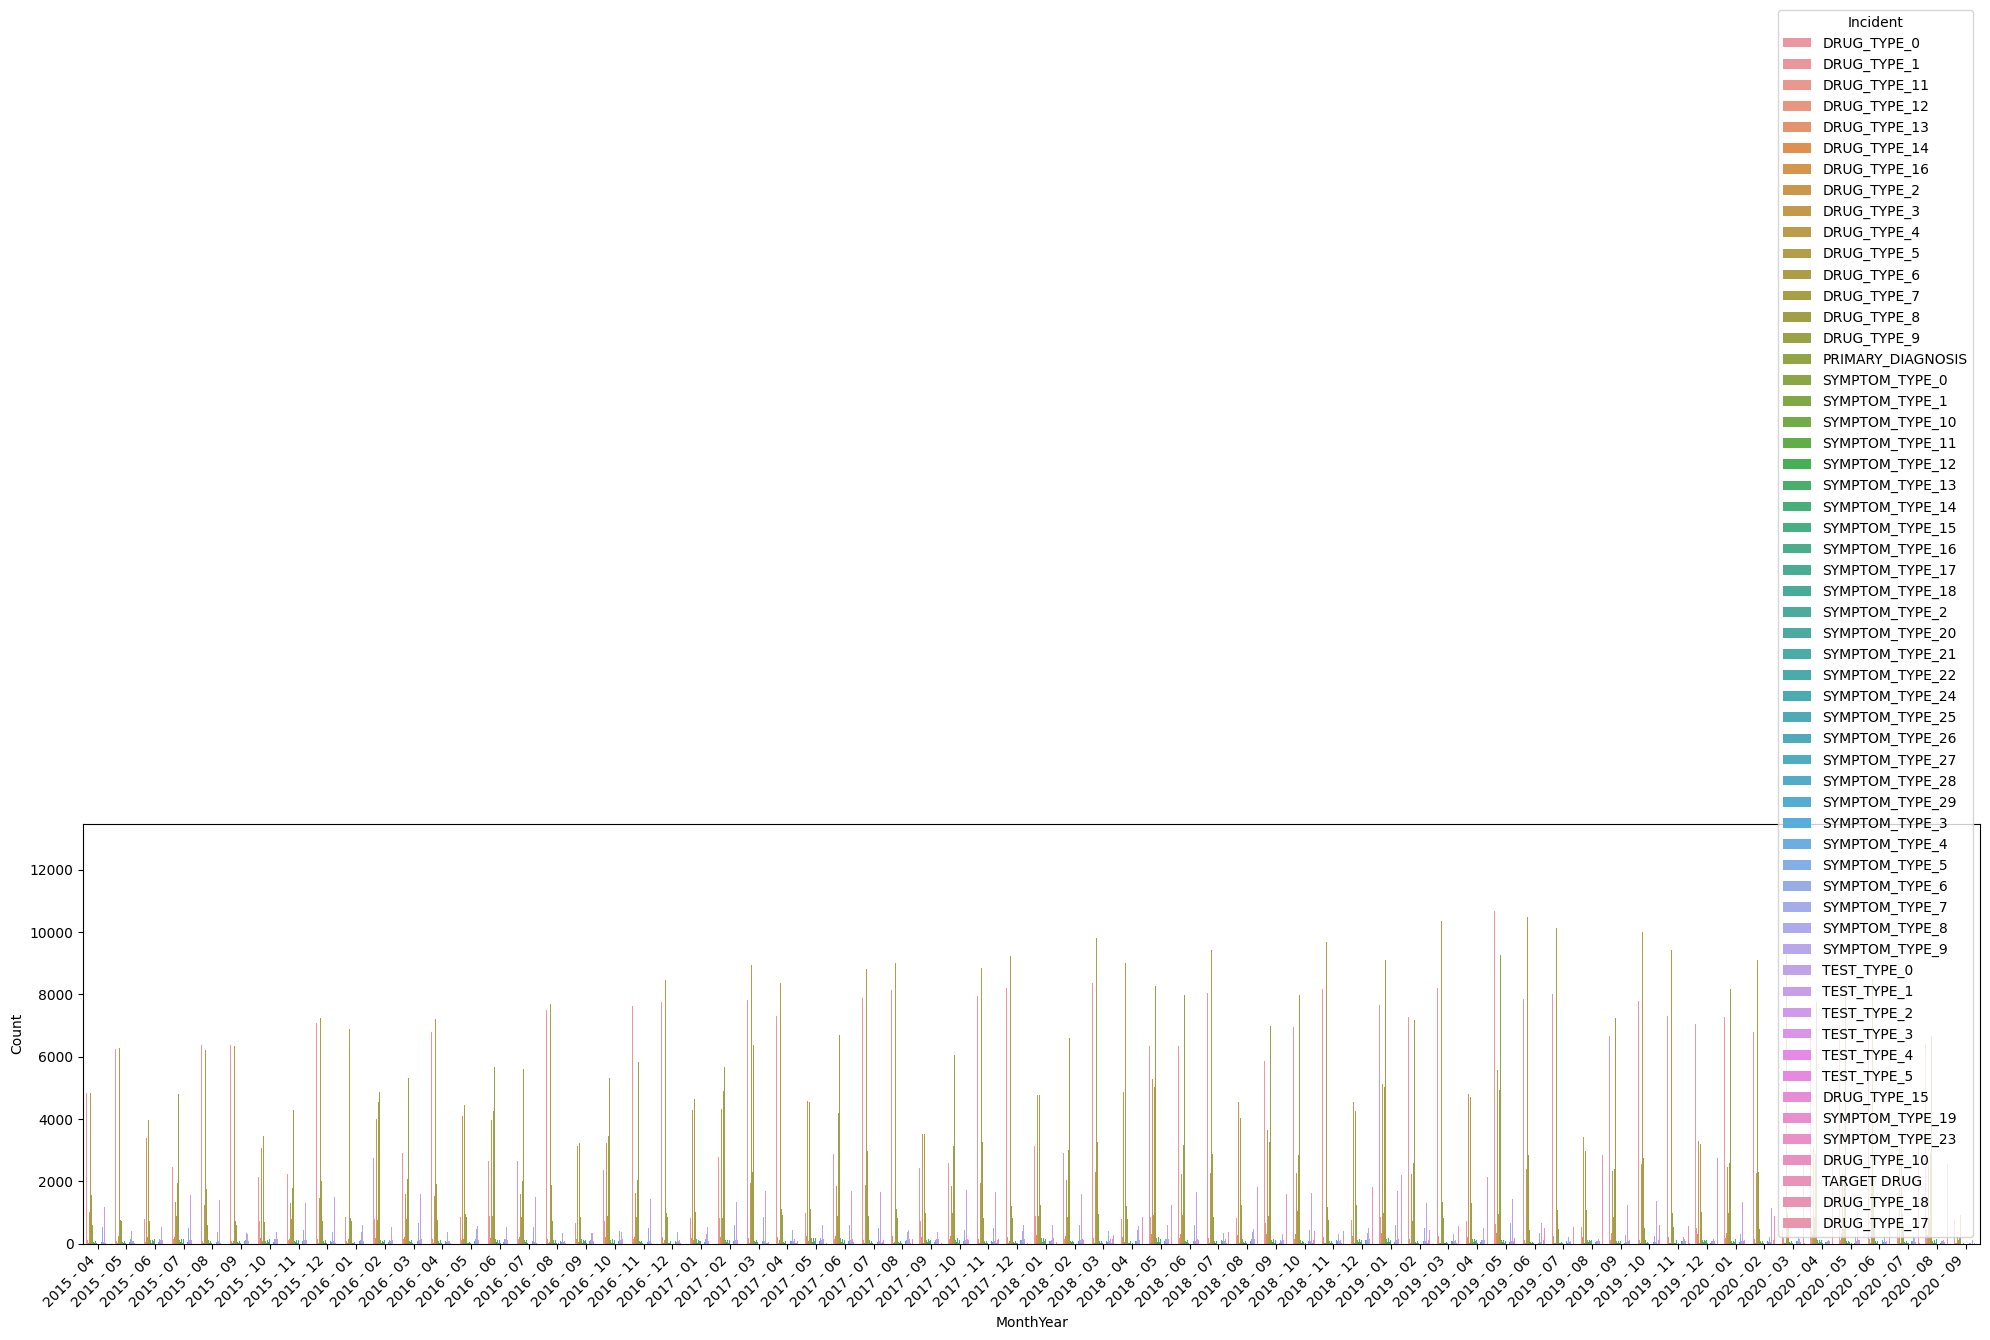

In [95]:
Incident_month_year['MonthYear'] =  Incident_month_year.apply(lambda row: f"{row['year']} - {row['month']:02d}", axis=1)

plt.figure(figsize=(20,10))

sns.barplot(data = Incident_month_year, x='MonthYear', y='Count', hue='Incident')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()


From this plot year 2019 more patients are consumed the Drug

In [17]:
df.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [18]:
# copy the dataset
df1 = df.copy()
df1

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [19]:
# making pivot table
# Patient with Incident

pivot_df1= df1.pivot_table(index= 'Patient-Uid', columns='Incident', values='Date' , aggfunc='count', fill_value=0)
pivot_df1

Incident,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,0,...,1,0,0,0,10,2,0,0,0,0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4,0,0,0,0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,0,...,0,0,0,0,3,2,0,0,0,0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,0,...,5,6,0,0,9,27,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,48,9,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,20,23,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,8,48,0,3,0,0,0,0,0,0,...,0,0,0,3,0,3,0,0,0,0


In [21]:
df2 = df.copy()

In [22]:
# extracting data from date column for unique patient ID
# for that deleting Incident column
df2.drop('Incident', axis=1)

,Patient-Uid,Date
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18
...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18


In [23]:
# Range of year
min_year = df2['Date'].dt.year.min()
max_year = df2['Date'].dt.year.min()

# creating a default dictionary to store the data
data_dict={}

# Loop through original data and updating the dictionary
for index, row in df2.iterrows():
  year_week = f"{row['Date'].year}-{row['Date'].week:02d}"
  if row['Patient-Uid'] not in data_dict:
    data_dict[row['Patient-Uid']] = {'Patient-Uid' : row['Patient-Uid']}
  data_dict[row['Patient-Uid']][year_week] = 1

week_data = list(data_dict.values())
week_df = pd.DataFrame(week_data)

# Fill missing values with 0
week_df = week_df.fillna(0)


In [24]:
# creating week wise column
week_df

,Patient-Uid,2019-10,2020-32,2020-16,2019-52,2018-47,2019-08,2019-12,2018-48,2019-05,...,2016-02,2016-39,2020-24,2018-41,2015-37,2019-33,2016-53,2019-16,2020-14,2020-19
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [25]:
# Merge the pivot and week datas
merged_df = pd.merge(pivot_df1,week_df, on='Patient-Uid', how='inner')
merged_df

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,2016-02,2016-39,2020-24,2018-41,2015-37,2019-33,2016-53,2019-16,2020-14,2020-19
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,48,9,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,20,23,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,8,48,0,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,7,44,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [26]:
# create the TARGET column
merged_df['TARGET'] = merged_df['TARGET DRUG'].apply(lambda x:1 if isinstance(x,int) and x!=0 else 0)

In [27]:
merged_df['TARGET'].value_counts()

0    17659
1     9374
Name: TARGET, dtype: int64

In [28]:
merged_df.drop('TARGET DRUG', axis = 1, inplace= True)

In [29]:
# creting data set for train, test split
x_table = merged_df.copy()

In [30]:
x_table.drop(['TARGET', 'Patient-Uid'], axis= 1, inplace = True)
x_table

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,2016-02,2016-39,2020-24,2018-41,2015-37,2019-33,2016-53,2019-16,2020-14,2020-19
0,29,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,27,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,7,0,10,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,42,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,45,0,24,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,48,9,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
27029,20,23,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27030,8,48,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27031,7,44,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [31]:
y_table = merged_df['TARGET']
y_table

0        0
1        0
2        0
3        0
4        0
        ..
27028    1
27029    1
27030    1
27031    1
27032    1
Name: TARGET, Length: 27033, dtype: int64

# Logestic Regression

In [32]:
# import required packages for train, test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_table,y_table,test_size=0.2, random_state=10)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# initialize the logistic regression model
model = LogisticRegression()

# fit the model on the training data
model.fit(X_train, y_train)

# Prediction on the test data
predictions = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Accuracy

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:" , accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
print("confusion_matrix:")
print(conf_matrix)

Accuracy: 0.8004438690586277
confusion_matrix:
[[3131  323]
 [ 756 1197]]


**CONFUSION MATRIX:**

True Positive - 3131,
False Positive - 323,
False Negative - 756,
True Negative - 1197

In [35]:
evaluation = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
evaluation

,Actual,Predicted
5178,0,0
17057,0,0
26734,1,0
19243,1,1
2096,0,0
...,...,...
16942,0,0
18405,1,1
24671,1,1
9285,0,0


# F1 Score

In [36]:
from sklearn.metrics import f1_score
#predictions on the validation/test data
y_pred = model.predict(X_test)

# F1 score
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

F1 score: 0.6893175928591996


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =100, max_depth=5, max_features=6, random_state=108)

# fit the model
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=6, random_state=108)

In [38]:
y_randompred = rf.predict(X_test)
y_randompred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
roc_auc_score(y_test, y_randompred)

0.5763346132670151

In [42]:
# Accuracy
accuracy_score(y_test, y_randompred)

0.6898464952838913

In [43]:
# confusion matrix
confusion_matrix(y_test, y_randompred)

array([[3403,   51],
       [1626,  327]])

In [44]:
# F1 score
f1_score(y_test, y_randompred)

0.2805662805662806

# XG - BOOST

In [47]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [50]:
# initialize the model
for lr in [0.01,0.05,0.1,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators = 100, verbosity = 0)

  # train the model
  model.fit(X_train,y_train)

  # scoreing the model-r2
  model.score(X_test, y_test)
  xgb_regressor = xgb.XGBRegressor()

  print("Learning rate:", lr, "Train score: ", model.score(X_train,y_train), "Cross-Val score :", cross_val_score(xgb_regressor, X_train, y_train, cv=5))


Learning rate: 0.01 Train score:  0.33659050700138693 Cross-Val score : [0.42486947 0.39842453 0.45399507 0.42753108 0.3958284 ]
Learning rate: 0.05 Train score:  0.5775461687229219 Cross-Val score : [0.42486947 0.39842453 0.45399507 0.42753108 0.3958284 ]
Learning rate: 0.1 Train score:  0.6544402113731833 Cross-Val score : [0.42486947 0.39842453 0.45399507 0.42753108 0.3958284 ]
Learning rate: 0.5 Train score:  0.8330329932851837 Cross-Val score : [0.42486947 0.39842453 0.45399507 0.42753108 0.3958284 ]
Learning rate: 0.7 Train score:  0.8760121594761717 Cross-Val score : [0.42486947 0.39842453 0.45399507 0.42753108 0.3958284 ]
Learning rate: 1 Train score:  0.9013707202744381 Cross-Val score : [0.42486947 0.39842453 0.45399507 0.42753108 0.3958284 ]


In [59]:
# finding the highest learning rate
model = xgb.XGBRegressor(learning_rate = 0.05, n_estimators = 100)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.459182530103978

**Above all 3 models . Logestic Regression model giving highest F1 score - 0.68**

# **Predictions for patients in test.parquet**

In [60]:
test = pd.read_parquet("/content/drive/MyDrive/Data Science/Structured_Data_Assignment/test.parquet", engine="auto")
test

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [61]:
df_test = test.copy()

From test dataset extracting datas by using same methodology used in Train dataset.

In [62]:
# making pivot table for test dataset
# Patient with Incident

pivot_test= df_test.pivot_table(index= 'Patient-Uid', columns='Incident', values='Date' , aggfunc='count', fill_value=0)
pivot_test

Incident,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,8,3,0,1,0,0,0,0,0,0,...,3,0,0,0,2,0,0,0,0,0
a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2,30,0,0,0,0,0,9,0,0,...,2,0,0,0,0,0,0,1,0,0
a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,4,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
a0f9eab1-1c7c-11ec-a732-16262ee38c7f,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a102720c-1c7c-11ec-bd9a-16262ee38c7f,33,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a102723c-1c7c-11ec-9f80-16262ee38c7f,4,6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
a102726b-1c7c-11ec-bfbf-16262ee38c7f,14,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df_test.drop('Incident', axis=1, inplace = True)

In [64]:
# Range of year
min_year = df_test['Date'].dt.year.min()
max_year = df_test['Date'].dt.year.min()

# creating a default dictionary to store the data
data_dict={}

# Loop through original data and updating the dictionary
for index, row in df_test.iterrows():
  year_week = f"{row['Date'].year}-{row['Date'].week:02d}"
  if row['Patient-Uid'] not in data_dict:
    data_dict[row['Patient-Uid']] = {'Patient-Uid' : row['Patient-Uid']}
  data_dict[row['Patient-Uid']][year_week] = 1

week_data = list(data_dict.values())
week_df_test = pd.DataFrame(week_data)

# Fill missing values with 0
week_df_test = week_df_test.fillna(0)

In [65]:
week_df_test

,Patient-Uid,2016-49,2018-42,2017-48,2018-49,2017-44,2018-19,2018-27,2019-21,2016-25,...,2020-05,2020-18,2020-26,2020-01,2020-29,2020-27,2020-30,2020-28,2020-31,2020-32
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Merge the pivot and week datas
merged_df_test = pd.merge(pivot_test,week_df_test, on='Patient-Uid', how='inner')
merged_df_test

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,2020-05,2020-18,2020-26,2020-01,2020-29,2020-27,2020-30,2020-28,2020-31,2020-32
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,8,3,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2,30,0,0,0,0,0,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,4,33,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,33,8,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,4,6,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,14,5,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,5,8,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
merged_df_test_final = merged_df_test.copy()

In [68]:
merged_df_test.drop('Patient-Uid', axis=1, inplace=True)

In [69]:
merged_df_test

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,2020-05,2020-18,2020-26,2020-01,2020-29,2020-27,2020-30,2020-28,2020-31,2020-32
0,8,3,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,30,0,0,0,0,0,9,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,33,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,33,8,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11478,4,6,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11479,14,5,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11480,5,8,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# check train and test data set has same features.

In [70]:
X_train.columns

Index(['DRUG_TYPE_0', 'DRUG_TYPE_1', 'DRUG_TYPE_10', 'DRUG_TYPE_11',
       'DRUG_TYPE_12', 'DRUG_TYPE_13', 'DRUG_TYPE_14', 'DRUG_TYPE_15',
       'DRUG_TYPE_16', 'DRUG_TYPE_17',
       ...
       '2016-02', '2016-39', '2020-24', '2018-41', '2015-37', '2019-33',
       '2016-53', '2019-16', '2020-14', '2020-19'],
      dtype='object', length=340)

In [71]:
merged_df_test.columns

Index(['DRUG_TYPE_0', 'DRUG_TYPE_1', 'DRUG_TYPE_10', 'DRUG_TYPE_11',
       'DRUG_TYPE_12', 'DRUG_TYPE_13', 'DRUG_TYPE_14', 'DRUG_TYPE_15',
       'DRUG_TYPE_16', 'DRUG_TYPE_17',
       ...
       '2020-05', '2020-18', '2020-26', '2020-01', '2020-29', '2020-27',
       '2020-30', '2020-28', '2020-31', '2020-32'],
      dtype='object', length=335)

In [72]:
X_train.shape

(21626, 340)

In [73]:
merged_df_test.shape

(11482, 335)

compare to test , train data has (340-335=5) 5 extra columns

In [74]:
# All columns are macthing except (DRUG_TYPE_18, TARGET DRUG, 2020-33, 2020-34, 2020-35, 2020-36) 6 columns
# For matching purpose we are going to delete this column

X_train_test = X_train.copy()
X_train_test.drop(['DRUG_TYPE_18', '2020-33', '2020-34', '2020-35', '2020-36'],axis =1,inplace =True)

In [75]:
X_train_test.shape

(21626, 335)

In [76]:
merged_df_test.shape

(11482, 335)

In [77]:
# Reordering columns in test data set with respect to train data set
merged_df_test_reordered = merged_df_test[X_train_test.columns]

In [78]:
# Initialize the logistic regression model
model_test = LogisticRegression()

# Fit the model on the training data
model_test.fit(X_train_test, y_train)

# Make predictions on the test data
predictions_test= model_test.predict(merged_df_test_reordered)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
y_pred_test = model_test.predict(merged_df_test_reordered)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
prediction_test = pd.DataFrame(y_pred_test)

In [81]:
prediction_test.shape

(11482, 1)

In [82]:
prediction_test.value_counts()

0    10489
1      993
dtype: int64

In [83]:
# Final submission
Final_submission = pd.concat([merged_df_test_final,prediction_test],axis = 1)
Final_submission

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,2020-18,2020-26,2020-01,2020-29,2020-27,2020-30,2020-28,2020-31,2020-32,0
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,8,3,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2,30,0,0,0,0,0,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,4,33,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,33,8,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,4,6,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,14,5,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,5,8,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [84]:
# changing the column name
Final_submission.rename(columns={ 0:'label'}, inplace = True)

In [85]:
Final_submission.columns

Index(['Patient-Uid', 'DRUG_TYPE_0', 'DRUG_TYPE_1', 'DRUG_TYPE_10',
       'DRUG_TYPE_11', 'DRUG_TYPE_12', 'DRUG_TYPE_13', 'DRUG_TYPE_14',
       'DRUG_TYPE_15', 'DRUG_TYPE_16',
       ...
       '2020-18', '2020-26', '2020-01', '2020-29', '2020-27', '2020-30',
       '2020-28', '2020-31', '2020-32', 'label'],
      dtype='object', length=337)

In [86]:
Final_submission_test = Final_submission[['Patient-Uid','label']]
Final_submission_test

,Patient-Uid,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0
...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,0


In [87]:
# Create CSV file for final submission
Final_submission_test.to_csv('Final_submission_test.csv', index = False)

In [88]:
# Download the Dataset
from IPython.display import FileLink

Final_submission_test_csv=FileLink('Final_submission_test.csv')
Final_submission_test_csv

/content/Final_submission_test.csv

# Conclusion:

* From the date column I derived the weekly data for all the span of years.
* Because of model complexity.(No of columns)
* If we create columns in date wise , it will give the more accurate
  predictions.
* In problem 1 a patient will be eligible for “Target Drug” or not in next  
  30 days.
* for this statement date wise prediction will give better result.
* In this model I have created Week wise . so we can consider Eligibility of  
  the TARGET DRUG is, if a patient did not took drug in past 4 weeks means then we can consider for TAGRET DRUG.  